In [74]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, chi2, SelectKBest, f_classif, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [4]:
folder = "house-prices-advanced-regression-techniques"
file = 'train'

In [75]:
# 检查写好的csv文件
X = pd.read_csv(os.path.join(folder, "X"+file+".csv"))
X = X.drop('SalePrice', 1)

In [76]:
if file == 'train':
    y = pd.read_csv(os.path.join(folder, "y"+file+".csv"))
    print(y.head())

   Id  SalePrice
0   1     208500
1   2     181500
2   3     223500
3   4     140000
4   5     250000


In [78]:
from sklearn import preprocessing
#split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#normalize data
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)
y_train_log = np.log1p(y_train['SalePrice'])
y_test_log = np.log1p(y_test['SalePrice'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0.5,1,'Normal distribution ($\\mu=$ 180921.20 and $\\sigma=$ 79415.29 )')]

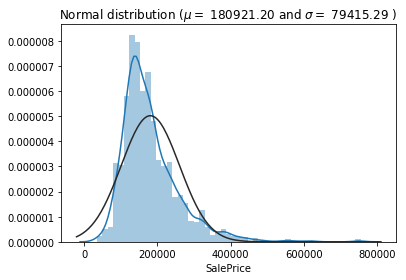

In [7]:
# distribution of the Price and fit of normal distribution
fig, ax1 = plt.subplots()
sns.distplot(X['SalePrice'], ax=ax1, fit=stats.norm)
(mu, sigma) = stats.norm.fit(X['SalePrice'])
ax1.set(title='Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma))


#log y(SalePrice)
y['SalePrice'] = np.log1p(y['SalePrice'])
# distribution of the log-transformed Price
fig, ax1 = plt.subplots()
sns.distplot(y['SalePrice'], ax=ax1, fit=stats.norm)
(mu, sigma) = stats.norm.fit(y['SalePrice'])
ax1.set(title='Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma))

fig, ax2 = plt.subplots()
stats.probplot(y['SalePrice'], plot=plt) 

### draw correlation figure


corr = X.corr()   # or df_train[num_columns].corr()
top_corr_feat = corr['SalePrice'].sort_values(ascending=False)[:25]
threshold = 0.55
top_corr = corr.index[np.abs(corr["SalePrice"]) > threshold]

plt.figure(figsize=(10,8))
sns.heatmap(X[top_corr].corr(),annot=True,cmap="RdBu_r")

 def result_GridCV(name, model):
    """
    Display the results on the RMSE after the GridSearchCV.
    """
    model.fit(X_train_minmax, y_train_log)
    y_train_pred = model.predict(X_train_minmax)
    y_test_pred = model.predict(X_test_minmax)
    
    print(y_test_pred[:100])
    print(y_train_pred[:100])
    mse_train = mean_absolute_error(y_train_log, y_train_pred)
    mse_test = mean_absolute_error(y_test_log, y_test_pred)

    print("{} - TRAIN score: {:.7f}" .format(name, mse_train))
    print("{} - TEST score: {:.7f}" .format(name, mse_test))

Feature ranking:
1. feature 6 (0.543455)
2. feature 26 (0.106497)
3. feature 21 (0.037586)
4. feature 40 (0.035608)
5. feature 41 (0.028812)
6. feature 23 (0.022670)
7. feature 17 (0.020566)
8. feature 8 (0.015550)
9. feature 2 (0.015512)
10. feature 213 (0.015409)
11. feature 37 (0.010945)
12. feature 7 (0.010288)
13. feature 9 (0.009414)
14. feature 24 (0.007534)
15. feature 39 (0.007184)
16. feature 45 (0.006053)
17. feature 13 (0.006021)
18. feature 107 (0.005549)
19. feature 20 (0.005155)
20. feature 1 (0.005032)
21. feature 0 (0.004442)
22. feature 38 (0.004246)
23. feature 16 (0.003829)
24. feature 52 (0.003506)
25. feature 43 (0.003123)
26. feature 44 (0.003045)
27. feature 34 (0.002870)
28. feature 33 (0.002507)
29. feature 15 (0.002337)
30. feature 10 (0.002291)
31. feature 180 (0.002266)
32. feature 22 (0.002155)
33. feature 35 (0.001767)
34. feature 29 (0.001686)
35. feature 31 (0.001681)
36. feature 46 (0.001677)
37. feature 42 (0.001571)
38. feature 14 (0.001566)
39. feat

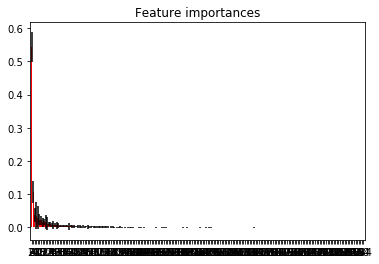

In [42]:

forest = RandomForestRegressor(n_estimators=250,random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


### Linear Regression

In [80]:

grid_linear = {'fit_intercept': [True, False], 'normalize': [True, False],
            'copy_X': [True, False]
           }
score = 'neg_mean_absolute_error'

grid_linear = GridSearchCV(LinearRegression(), grid_linear, cv=5, scoring=score, verbose=1)
grid_linear.fit(X_train, y_train)
print(grid_linear.best_params_)
linearregression = make_pipeline(RobustScaler(), grid_linear.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'copy_X': True, 'fit_intercept': True, 'normalize': False}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.7s finished


In [83]:
result_GridCV('Linear Regression', linearregression);

[ 1.18642578e+01  1.27258301e+01  1.14838867e+01  1.20725098e+01
  1.26135254e+01  1.13059082e+01  1.24108887e+01  1.18303223e+01
  1.13801270e+01  1.20197754e+01  1.16733398e+01  1.16345215e+01
  1.14375000e+01  1.22429199e+01  1.18522949e+01  1.17338867e+01
  1.21064453e+01  1.13791504e+01  1.16955566e+01  1.22868652e+01
  1.18769531e+01  1.22014160e+01  1.20732422e+01  1.17729492e+01
  1.22287598e+01  1.19755859e+01  1.21916504e+01  1.15312500e+01
  1.20283203e+01  1.22189941e+01  1.20769043e+01  1.25769043e+01
  1.19680176e+01  1.17319336e+01  1.24289551e+01  1.19794922e+01
  1.19206543e+01  1.22983398e+01  1.25175781e+01  1.17355957e+01
  1.18869629e+01  1.22673340e+01  1.15510254e+01  1.27316895e+01
  1.15993652e+01  1.17416992e+01  1.15524902e+01  1.17148438e+01
  1.31762695e+01  1.18486328e+01  1.16567383e+01  1.21738281e+01
  1.16743164e+01  1.30891113e+01  1.18435059e+01  1.24494629e+01
  1.21613770e+01  1.18269043e+01  1.18110352e+01  1.14125977e+01
  1.09372559e+01  1.19577

### Support Vector Regression


In [158]:
grid_svr = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 3, 4],
            'gamma': ['scale', 'auto'], 'C': [1, 2], 'epsilon': [0.1, 0.2]
           }
score = 'neg_mean_absolute_error'

grid_svr = GridSearchCV(SVR(), grid_svr, cv=5, scoring=score, verbose=1)
grid_svr.fit(X_train, y_train)
print(grid_svr.best_params_)


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 1, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    0.7s finished


In [175]:
svr = make_pipeline(RobustScaler(), grid_svr.best_estimator_)
result_GridCV('Support Vector Regressor', svr);

Support Vector Regressor - TRAIN score: 0.0069369
Support Vector Regressor - TEST score: 0.0072134


### Random Forest Regressor

In [166]:
grid_rfr = {'n_estimators': [10, 50, 100, 200], 'criterion': ['mae'],
            'max_features': ['sqrt', 'auto', 'log2', 0.2, 0.3, None], 'min_samples_leaf': [20, 30, 50, 100],  
           }
score = 'neg_mean_absolute_error'

grid_rfr = GridSearchCV(RandomForestRegressor(), grid_rfr, cv=5, scoring=score, verbose=1)
grid_rfr.fit(X_train, y_train)
print(grid_rfr.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 13.9min finished


{'criterion': 'mae', 'max_features': None, 'min_samples_leaf': 20, 'n_estimators': 200}


In [167]:
rfr = make_pipeline(RobustScaler(), grid_rfr.best_estimator_)
result_GridCV('Random Forest Regressor', rfr);

Random Forest Regressor - TRAIN score: 0.0002580
Random Forest Regressor - TEST score: 0.0004465


### Decision Tree Regressor

In [173]:
grid_dtr = {'criterion': ['mae'], 'splitter': ['best', 'random'],
            'max_features': ['sqrt', 'auto', 'log2', 0.2, 0.3, None], 'min_samples_leaf': [20, 30, 50, 100],  
           }
score = 'neg_mean_absolute_error'

grid_dtr = GridSearchCV(DecisionTreeRegressor(), grid_dtr, cv=5, scoring=score, verbose=1)
grid_dtr.fit(X_train, y_train)
print(grid_dtr.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'criterion': 'mae', 'max_features': 'auto', 'min_samples_leaf': 20, 'splitter': 'best'}


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    8.8s finished


In [174]:
dtr = make_pipeline(RobustScaler(), grid_dtr.best_estimator_)
result_GridCV('Decision Tree Regressor', dtr);

Decision Tree Regressor - TRAIN score: 0.0003063
Decision Tree Regressor - TEST score: 0.0004642


### Xgboost Regressor

In [190]:
params_xgb = {'gamma': [0.03,0.04,0.05], 'max_depth': [3,4], 'reg_alpha': [0], 'reg_lambda': [1], 
             'n_estimators': [500,1000], 'learning_rate': [0.02,0.04], 'subsample': [0.5,0.6]}
score = 'neg_mean_absolute_error'

grid_xgb = GridSearchCV(XGBRegressor(), params_xgb, cv=5, scoring=score, verbose=1)
grid_xgb.fit(X_train, y_train)
print(grid_xgb.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[19:43:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[19:43:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:44:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:44:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:44:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:44:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:44:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:44:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:44:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:45:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:46:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:46:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:46:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:46:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:46:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:46:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:47:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:48:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:48:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:48:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:48:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:48:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:49:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  6.8min finished


[19:50:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'gamma': 0.03, 'learning_rate': 0.04, 'max_depth': 3, 'n_estimators': 1000, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.5}


In [192]:
xgb = XGBRegressor(gamma=0.03, learning_rate=0.04,max_depth=3, n_estimators=1000, subsample=0.5);

In [193]:
result_GridCV('Xgboost Regressor', xgb);

[19:52:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost Regressor - TRAIN score: 0.0065204
Xgboost Regressor - TEST score: 0.0072521


### Average Model

In [197]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # clones of the actual model 
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Training of the clone model
        for model in self.models_:
            model.fit(X, y)
        return self
    
    # prediction and average of the trained clone models
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)   

In [198]:
averaged_models = AveragingModels(models=(linearregression, svr, rfr, dtr, xgb))
result_GridCV('Averaged models', averaged_models)

[20:00:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Averaged models - TRAIN score: 0.0027574
Averaged models - TEST score: 0.0030167


In [220]:
averaged_models.fit(X, y['SalePrice'])

[20:11:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


AveragingModels(models=(Pipeline(memory=None,
                                 steps=[('robustscaler',
                                         RobustScaler(copy=True,
                                                      quantile_range=(25.0,
                                                                      75.0),
                                                      with_centering=True,
                                                      with_scaling=True)),
                                        ('linearregression',
                                         LinearRegression(copy_X=True,
                                                          fit_intercept=True,
                                                          n_jobs=None,
                                                          normalize=False))],
                                 verbose=False),
                        Pipeline(memory=None,
                                 steps=[('robustscaler',
                  

### Final Result

In [221]:
X_res = pd.read_csv(os.path.join(folder, "Xtest.csv"))
average_final = np.expm1(averaged_models.predict(X_res))

ValueError: operands could not be broadcast together with shapes (1459,199) (215,) (1459,199) 

In [203]:
X_res.shape

(1459, 199)

In [212]:
df_sub = pd.DataFrame({'Id': X_res['Id'], 'SalePrice': average_final})
print(df_sub.head())
df_sub.to_csv('submission.csv',index=False)

ValueError: array length 1460 does not match index length 1459

,Id,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,1461,80.0,11622,3,3,2,4,5,82,11,...,0,1,1,0,0,0,0,0,1,0
1,1462,81.0,14267,2,3,2,5,5,79,8,...,0,1,1,0,0,0,0,1,0,0
2,1463,74.0,13830,2,3,2,4,4,118,48,...,0,1,1,0,0,0,0,0,1,0
3,1464,78.0,9978,2,3,2,5,5,119,48,...,0,1,1,0,0,0,0,1,0,0
4,1465,43.0,5005,2,1,2,7,4,113,42,...,0,1,1,0,0,0,0,0,1,0
